In [11]:
#!pip install graphviz

In [12]:
# Load libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from mlxtend.plotting
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [13]:
# Load dataset

heart = pd.read_csv("C:/Users/offor/OneDrive/Documents/UWE CORE COURSES/Machine Learning/Course work/heart_failure_clinical_records.csv")

In [14]:
# Display dataset

heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


c:\Users\offor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


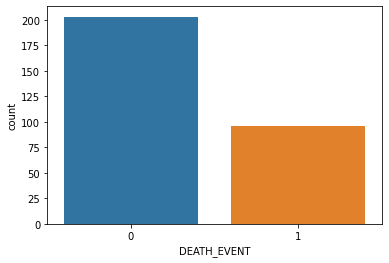

In [26]:
# plot bar chart of target varibale

sns.countplot(heart['DEATH_EVENT'])
plt.show()

In [27]:
# extracting only the independent varaibles 
x = heart.iloc[:,[0,2,4,5,6,7]].values

# Extracting only the dependent variable
y = heart.iloc[:,12].values

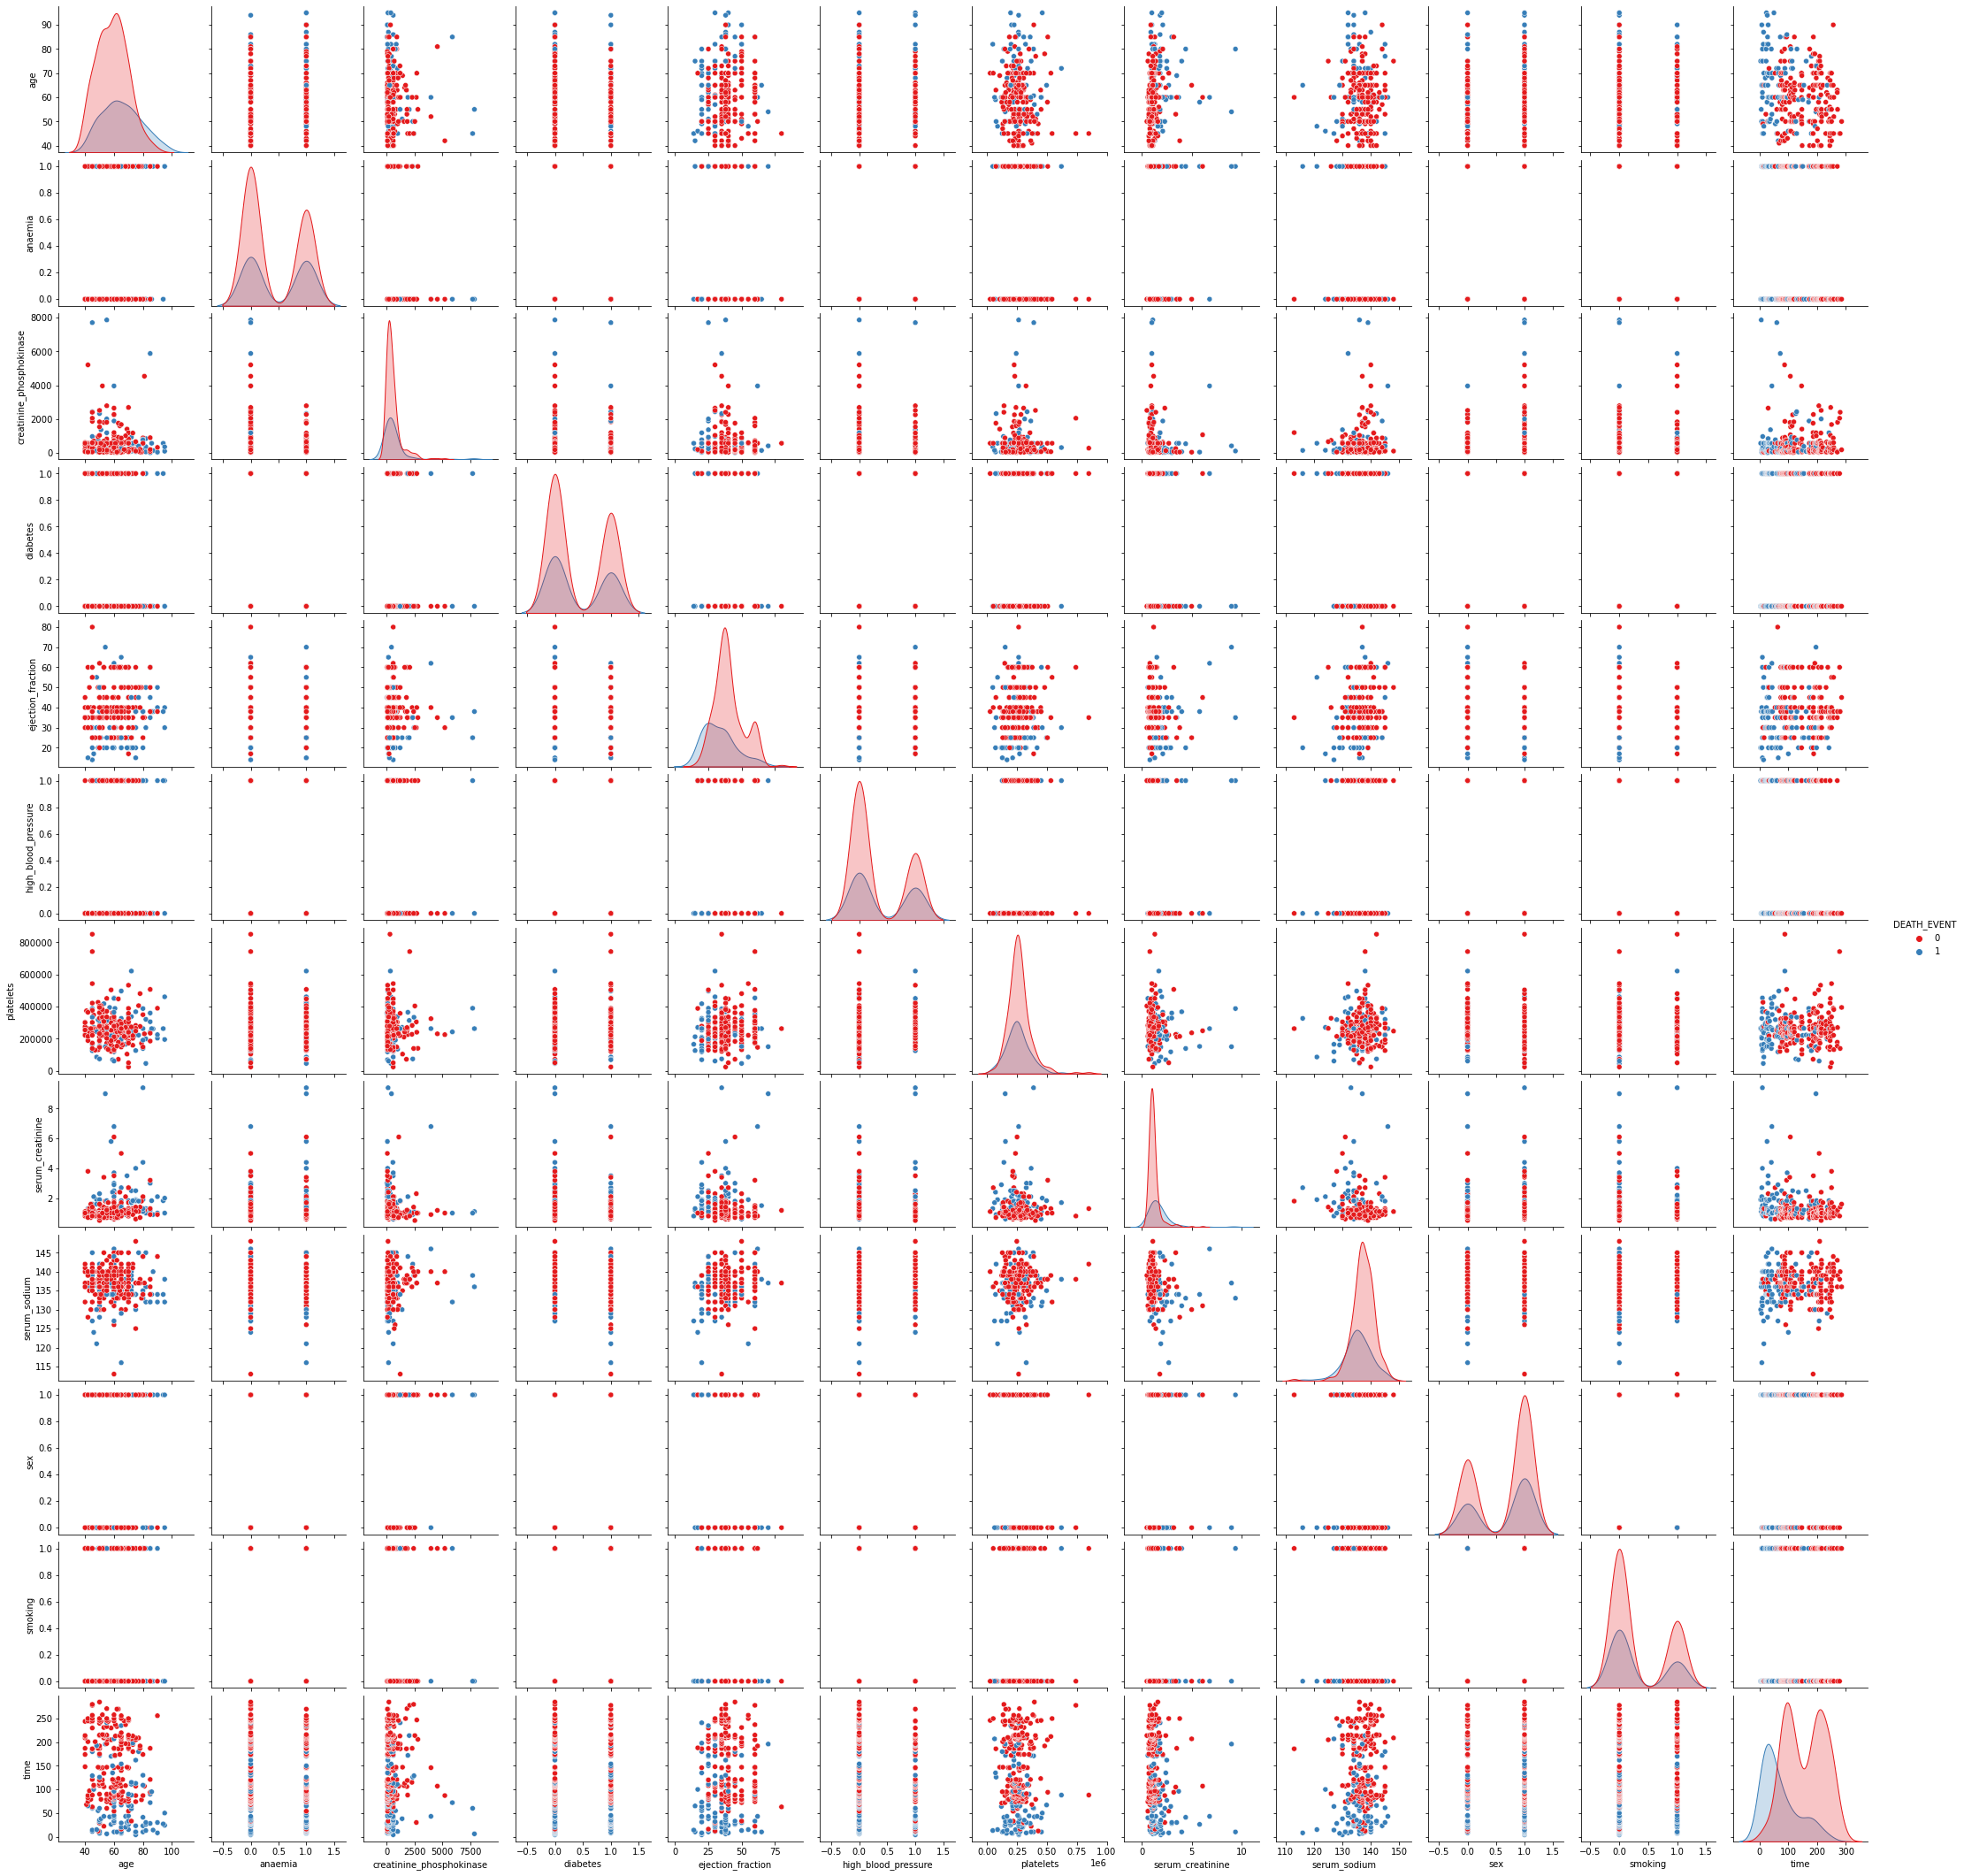

In [28]:
# pairplot showing correlation

sns.pairplot(heart, hue='DEATH_EVENT', palette='Set1')

<AxesSubplot:>

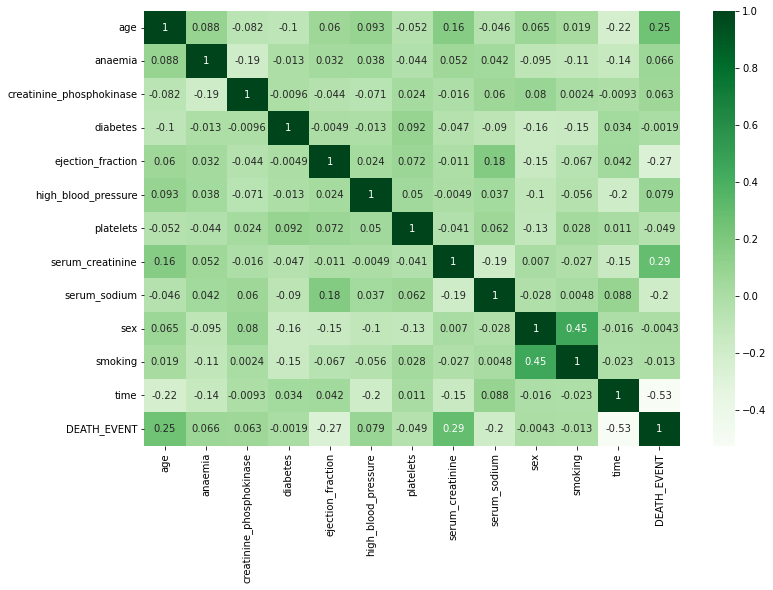

In [18]:
# Pearson's correlation

plt.figure(figsize=(12,8))
sns.heatmap(heart.corr(),cmap='Greens', annot=True)


In [19]:
# Ranking correlation 

abs(heart.corr()[['DEATH_EVENT']].sort_values('DEATH_EVENT', ascending = False))

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.294278
age,0.253729
high_blood_pressure,0.079351
anaemia,0.066270
creatinine_phosphokinase,0.062728
diabetes,0.001943
sex,0.004316
smoking,0.012623
platelets,0.049139


In [20]:
abs(heart.corr()['DEATH_EVENT'][abs(heart.corr()['DEATH_EVENT'])>0.4].drop('DEATH_EVENT')).index.tolist()

['time']

In [21]:
# splitting the dataset into the training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [22]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [23]:
# Logistic Regression

In [ ]:
# Fitting logistics regression to training dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

In [25]:
# predicting the test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

# Logistic Regression

In [ ]:
# confusion matrix evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [475]:
# confusion matrix evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  5],
       [17, 10]], dtype=int64)

In [476]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

In [477]:
# Let's see how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        48
           1       0.67      0.37      0.48        27

    accuracy                           0.71        75
   macro avg       0.69      0.63      0.64        75
weighted avg       0.70      0.71      0.68        75

[[43  5]
 [17 10]]


# Decision Tree

In [478]:
dtree = DecisionTreeClassifier()

In [479]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [480]:
predictions = dtree.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [481]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        48
           1       0.58      0.52      0.55        27

    accuracy                           0.69        75
   macro avg       0.66      0.66      0.66        75
weighted avg       0.69      0.69      0.69        75



In [482]:
print(confusion_matrix(y_test, predictions))

[[38 10]
 [13 14]]


# KNN Neigbors

In [483]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [484]:
y_pred = classifier.predict(x_test)

In [485]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        48
           1       0.60      0.44      0.51        27

    accuracy                           0.69        75
   macro avg       0.66      0.64      0.64        75
weighted avg       0.68      0.69      0.68        75



In [486]:
print(confusion_matrix(y_test, predictions))

[[38 10]
 [13 14]]


# SVC Classifier

In [487]:
clf = svm.SVC()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

In [488]:
# Let's see how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        48
           1       0.57      0.48      0.52        27

    accuracy                           0.68        75
   macro avg       0.65      0.64      0.64        75
weighted avg       0.67      0.68      0.67        75

[[38 10]
 [14 13]]


# Neural Networks

In [489]:
mlpc = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=200)
mlpc.fit(x_train, y_train)
pred_mlpc = mlpc.predict(x_test)

C:\Users\offor\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [490]:
#Let's see how our model performs
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        48
           1       0.58      0.41      0.48        27

    accuracy                           0.68        75
   macro avg       0.65      0.62      0.62        75
weighted avg       0.67      0.68      0.66        75

[[38 10]
 [14 13]]


# Random Forest

In [556]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [562]:
x_train

array([[4.50e+01, 6.60e+01, 2.50e+01, 0.00e+00, 2.33e+05, 8.00e-01],
       [8.20e+01, 8.55e+02, 5.00e+01, 1.00e+00, 3.21e+05, 1.00e+00],
       [7.00e+01, 5.90e+01, 6.00e+01, 0.00e+00, 2.55e+05, 1.10e+00],
       ...,
       [8.50e+01, 1.02e+02, 6.00e+01, 0.00e+00, 5.07e+05, 3.20e+00],
       [6.00e+01, 5.82e+02, 3.80e+01, 1.00e+00, 4.51e+05, 6.00e-01],
       [7.00e+01, 1.71e+02, 6.00e+01, 1.00e+00, 1.76e+05, 1.10e+00]])

In [557]:
#lets see how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        48
           1       0.60      0.44      0.51        27

    accuracy                           0.69        75
   macro avg       0.66      0.64      0.64        75
weighted avg       0.68      0.69      0.68        75

[[40  8]
 [15 12]]


In [583]:
forest = RandomForestClassifier(n_estimators=100,random_state=1)

In [584]:
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [585]:
importance_vals = forest.feature_importances_
indices = np.argsort(importance_vals)[::-1]

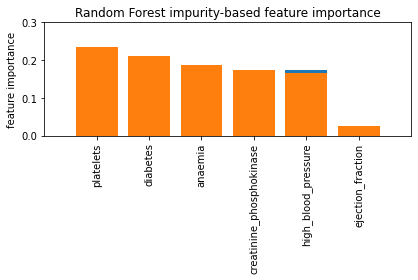

In [588]:
# Impurity based feature selection
plt.figure()
plt.title("Random Forest impurity-based feature importance")
plt.bar(range(x_train.shape[1]), importance_vals[indices])

plt.ylabel('feature importance')
plt.bar(range(x_train.shape[1]),
        importances[indices],
        align='center')

feat_labels = heart.columns[1:]
plt.xticks(range(x_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.ylim([0, 0.3])

plt.tight_layout()
#plt.savefig('1.pdf')
plt.show()

(-1.0, 6.0)

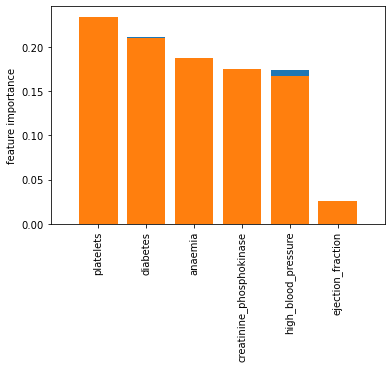

In [589]:
#plt.figure()
#plt.title("Random Forest impurity-based feature importance")
plt.bar(range(x_train.shape[1]), importance_vals[indices])

plt.ylabel('feature importance')
plt.bar(range(x_train.shape[1]),
        importances[indices],
        align='center')

feat_labels = heart.columns[1:]
plt.xticks(range(x_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])

# Voting / Stacking

In [493]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = DecisionTreeClassifier()
m4 = RandomForestClassifier()
m5 = svm.SVC()

In [494]:
model = VotingClassifier([('knn',m1),('lr',m2),('dt',m3),('rfc',m4),('svm',m5)], voting = 'hard')

In [1]:
x_train, x_test, y_train, y_test = train_test_split(heart.iloc[:,[0,2,4,5,6,7]].values,heart.iloc[:,12].values, test_size = 0.25, random_state = 0)

NameError: name 'train_test_split' is not defined

In [496]:
model.fit(x_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rfc', RandomForestClassifier()),
                             ('svm', SVC())])

In [497]:
model.score(x_train, y_train)*100

92.41071428571429

In [498]:
model.score(x_test, y_test)*100

64.0

In [ ]:
accuracy_score(y_test, y_pred)

# Boosting 

In [499]:
from sklearn.ensemble import AdaBoostClassifier

In [500]:
abc = AdaBoostClassifier(n_estimators=10, random_state=0)
abc.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=0)

In [501]:
y_pred = abc.predict(x_test)

In [502]:
abc.score(x_train, y_train)

0.8035714285714286

In [503]:
accuracy_score(y_test, y_pred)

0.7466666666666667

# Bagging

In [504]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators = 20)
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [505]:
# decision tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [506]:
bg.score(x_train, y_train)

0.9508928571428571

In [507]:
bg.score(x_test, y_test)

0.7066666666666667

# AdaBoost

In [508]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 20, learning_rate = 1)
adb.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=20)

In [509]:
adb.score(x_test, y_test)

0.64

In [510]:
adb.score(x_train, y_train)

1.0

# Plot Boxplot

In [30]:
dg = { 'Model': ['LGR', 'DT','KNN', 'SVC', 'RF'],
      'Means': [0.68, 0.64, 0.68,0.67,0.74]}
    
df = pd.DataFrame(dg)
df

,Model,Means
0,LGR,0.68
1,DT,0.64
2,KNN,0.68
3,SVC,0.67
4,RF,0.74


<AxesSubplot:xlabel='Means', ylabel='Model'>

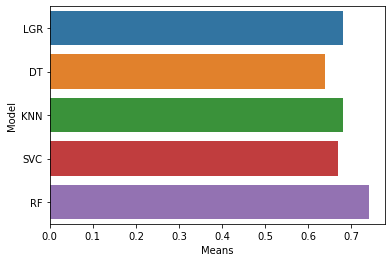

In [33]:
sns.barplot(y='Model' ,x='Means' ,data=df)

<AxesSubplot:xlabel='Name', ylabel='Means'>

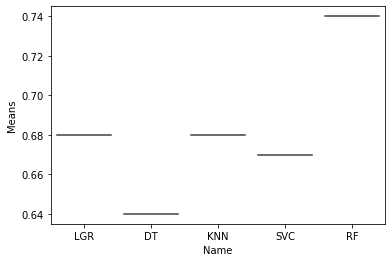

In [29]:
sns.violinplot(x='Name' ,y='Means' ,data=df)
#sns.swarmplot(x='Name' ,y='WeightM' ,data=df)